In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import os
import gc

In [2]:
train_dir_0 = '/home/waqar/Documents/0_0/'
train_dir_1 = '/home/waqar/Documents/1_0/'

In [3]:
train_0 = ['/home/waqar/Documents/0_0/{}'.format(i) for i in os.listdir(train_dir_0)]
train_1 = ['/home/waqar/Documents/1_0/{}'.format(i) for i in os.listdir(train_dir_1)]

In [4]:
train_imgs = train_0[:500] + train_1[:500]
random.shuffle(train_imgs)

In [5]:
spare_imgs = train_0[501:] + train_1[501:]

In [6]:
spare_imgs[0]

'/home/waqar/Documents/0_0/714.png'

In [7]:
from PIL import Image 
try: 
    o_count = 0
    y_count = 0
    for im in spare_imgs:
        
        #Relative Path 
        img = Image.open(im)  
        
        if '0_0' in im:
            img.save('/home/waqar/Documents/t_0_0/{}.png'.format(o_count))
            o_count+=1
        elif '1_0' in im:
            img.save('/home/waqar/Documents/t_1_0/{}.png'.format(y_count))
            y_count+=1
except IOError: 
    print(a)
    pass

In [8]:
nrows = 150
ncolumns = 150
channel = 3

In [9]:
X = [] #images
Y = [] #Labels

In [10]:
def read_and_process_image(list_of_images):
    X = [] #images
    Y = [] #labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation=cv2.INTER_CUBIC))
        
        if '0_0' in image:
            Y.append(0)
        elif '1_0' in image:
            Y.append(1)
    return X, Y

In [11]:
X, y = read_and_process_image(train_imgs)

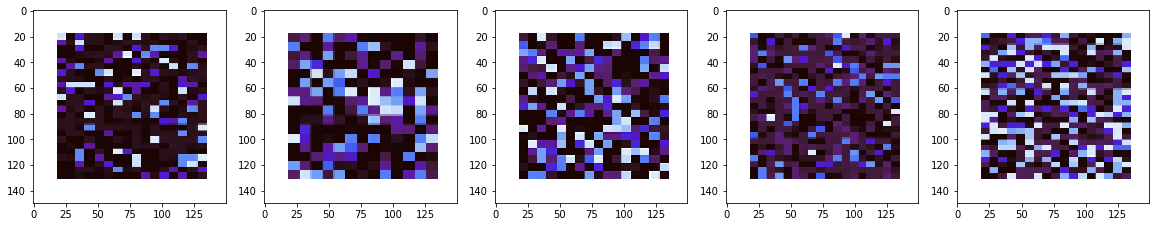

In [12]:
plt.figure(figsize=(20,10))
columns=5
for i in range(columns):
    plt.subplot(5/columns + 1, columns, i+1)
    plt.imshow(X[i])

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
print('X shape {}'.format(X.shape))
print('Y shape {}'.format(y.shape))

X shape (1000, 150, 150, 3)
Y shape (1000,)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)
print('Shape of train images ',X_train.shape)
print('Shape of validation images ', X_val.shape)
print('Shape of label is ', y_train.shape)
print('Shape of label is ', y_val.shape)

Shape of train images  (800, 150, 150, 3)
Shape of validation images  (200, 150, 150, 3)
Shape of label is  (800,)
Shape of label is  (200,)


In [17]:
ntrain = len(X_train)
nval = len(X_val)

batch_size = 32

In [18]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [21]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [24]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=ntrain // batch_size,
                             epochs=64,
                             validation_data=val_generator,
                             validation_steps=nval // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/64
25/25 [==============================] - 77s 3s/step - loss: 0.6956 - acc: 0.5200 - val_acc: 0.4896 - val_loss: 0.7037
Epoch 2/64
25/25 [==============================] - 81s 3s/step - loss: 0.6969 - acc: 0.4913 - val_acc: 0.6615 - val_loss: 0.6827
Epoch 3/64
25/25 [==============================] - 78s 3s/step - loss: 0.6889 - acc: 0.5125 - val_acc: 0.7188 - val_loss: 0.6697
Epoch 4/64
25/25 [==============================] - 54s 2s/step - loss: 0.6734 - acc: 0.6050 - val_acc: 0.6354 - val_loss: 0.6549
Epoch 5/64
25/25 [==============================] - 70s 3s/step - loss: 0.6541 - acc: 0.6150 - val_acc: 0.4896 - val_loss: 0.6568
Epoch 6/64
25/25 [==============================] - 72s 3s/step - loss: 0.6297 - acc: 0.6212 - val_acc: 0.6875 - val_loss: 0.5653
Epoch 7/64
25/25 [==============================] - 100s 4s/step - loss: 0.6037 - acc: 0.6812 - val_acc: 0.6354 - val_loss: 0.5676
Epoch 8/64
25

25/25 [==============================] - 104s 4s/step - loss: 0.2550 - acc: 0.8913 - val_acc: 0.9010 - val_loss: 0.2876
Epoch 62/64
25/25 [==============================] - 98s 4s/step - loss: 0.2343 - acc: 0.9038 - val_acc: 0.9219 - val_loss: 0.2051
Epoch 63/64
25/25 [==============================] - 51s 2s/step - loss: 0.2608 - acc: 0.8838 - val_acc: 0.6510 - val_loss: 1.0170
Epoch 64/64
25/25 [==============================] - 50s 2s/step - loss: 0.2419 - acc: 0.8975 - val_acc: 0.8385 - val_loss: 0.3954


In [25]:
model.save_weights('/home/waqar/Documents/model_wieghts.h5')
model.save('/home/waqar/Documents/model_keras.h5')

<Figure size 432x288 with 0 Axes>

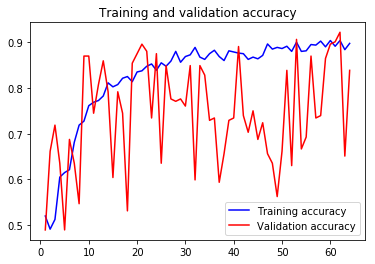

<Figure size 432x288 with 0 Axes>

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


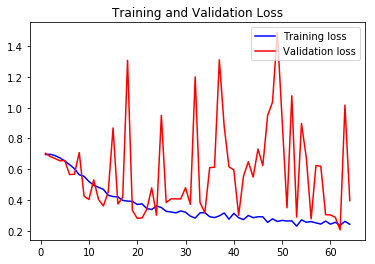

In [27]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
